## Timeseries Tools Usage
This notebook demonstrates loading in a Nowcast timeseries using `timeseries_tools`. `Timeseries_tools` extracts only the required fields from the Nowcast netCDF files and concatenates the flattened (time, space) numpy arrays together. This uses a minimum amount of memory relative to bulkier routines such as `mfdataset`. The flattened arrays are reshaped before they are returned, but there is an option to keep them flattened, which is necessary for certain data analysis methods like principal component analysis.

In [23]:
from salishsea_tools import timeseries_tools, grid_tools, viz_tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xarray as xr

%matplotlib inline

First specify a timerange.

In [30]:
# Timerange
timerange = ['2017 Jan 1 00:00', '2017 Jan 10 23:00']

Then load grid and mask files

In [31]:
# Load mask and grid
mask = xr.open_dataset('/ocean/bmoorema/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
grid = xr.open_dataset('/ocean/bmoorema/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
grid_GEM = xr.open_dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2017m01d01.nc')

Next build the GEM mask

In [ ]:
# Build GEM mask
mask_GEM = grid_tools.build_GEM_mask(grid_GEM, grid, mask.tmask.isel(t=0, z=0))

`timeseries_tools` has method for constructing a list of Nowcast results file strings.

In [32]:
# Make filenames list
filenames = timeseries_tools.make_filename_list(timerange, 'T', model='nowcast-green', resolution='h')

Call the main function `load_NEMO_timeseries` and specify a dimension for slicing (required).

In [76]:
# Load Results
T_surface, coords = timeseries_tools.load_NEMO_timeseries(filenames, mask, 'votemper', 'deptht', index=0)

100% (10 of 10) |###################################| Elapsed Time: 0:00:29 Time: 0:00:29


In [65]:
# Load Results
T_450, coords = timeseries_tools.load_NEMO_timeseries(filenames, mask, 'votemper', 'y', index=450)

100% (10 of 10) |###################################| Elapsed Time: 0:00:19 Time: 0:00:19


In [67]:
# Load Results
T_500, coords = timeseries_tools.load_NEMO_timeseries(filenames, mask, 'votemper', 'y', index=500)

100% (10 of 10) |###################################| Elapsed Time: 0:00:15 Time: 0:00:15


Plot the results. I've modified `viz_tools.plot_boundary` to accept grid and mask files, so this can be a tool for plotting coastlines and bathymetry.

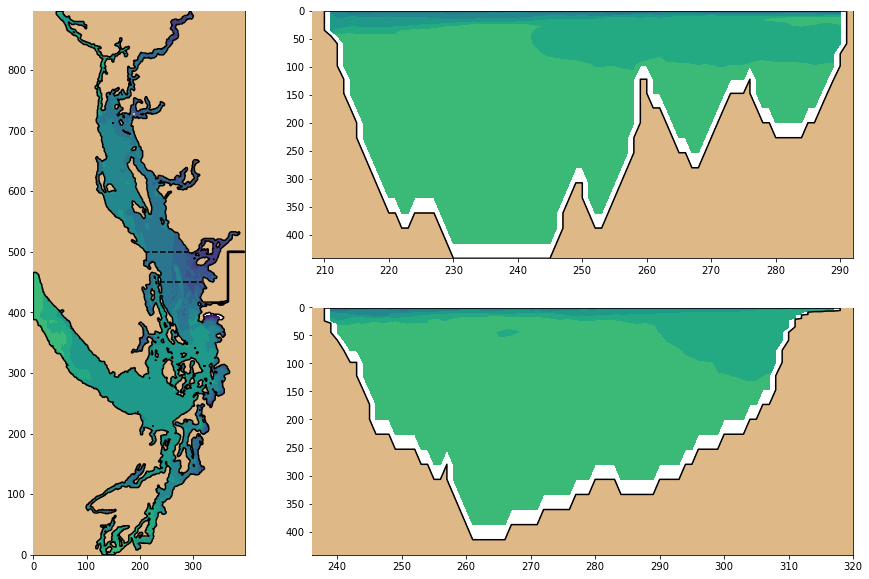

In [84]:
fig = plt.figure(figsize=(15, 10))

gs = gridspec.GridSpec(2, 3)
#gs.update(hspace=0.4)

ax = [0, 0, 0]
ax[0] = plt.subplot(gs[:, 0])
ax[1] = plt.subplot(gs[0, 1:])
ax[2] = plt.subplot(gs[1, 1:])

patch, boundary = viz_tools.plot_boundary(ax[0], grid, mask, dim='depth', index=0, coords='grid')
viz_tools.set_aspect(ax[0])
ax[0].contourf(coords['gridX'], coords['gridY'], T_surface[0, ...], levels=range(15))
ax[0].plot([236, 320], [450, 450], 'k--')
ax[0].plot([208, 292], [500, 500], 'k--')

patch, boundary = viz_tools.plot_boundary(ax[1], grid, mask, dim='y', index=500, coords='grid')
ax[1].contourf(coords['gridX'], coords['depth'], np.ma.masked_values(T_500[0, ...], 0), levels=range(15))
ax[1].set_xlim([208, 292])

patch, boundary = viz_tools.plot_boundary(ax[2], grid, mask, dim='y', index=450, coords='grid')
ax[2].contourf(coords['gridX'], coords['depth'], np.ma.masked_values(T_450[0, ...], 0), levels=range(15))
ax[2].set_xlim([236, 320])

plt.show()